In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.naive_bayes import GaussianNB
from botorch.utils.transforms import unnormalize, normalize

c:\Users\goura\anaconda3\envs\botorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filename = r'../data/olhs_run1.xlsx'
x_pd = pd.read_excel(filename, sheet_name='Initial Design (OLHS)', header=[0,1], index_col=[0])
y_pd = pd.read_excel(filename, sheet_name='bo_data', header=[0,1], index_col=[0])

dtype=torch.double

x = torch.tensor(x_pd.values, dtype=dtype)
mfg = torch.tensor(y_pd['Manufacturability'].values, dtype=torch.long)

x_bounds = np.array([[2000, 10000], [0, 100], [0, 40], [5000, 15000], [80, 100], [0,100], [60, 100], [70, 100]])
x_bounds = torch.tensor(x_bounds.T, dtype=dtype)

x = normalize(x, bounds=x_bounds)

In [3]:
model = GaussianNB() 

model.fit(x, mfg.squeeze())

GaussianNB()

In [4]:
x_sample = x[0,:].reshape(1,-1)

yhat_prob = model.predict_proba(x)
print('Predicted probability ', yhat_prob)

Predicted probability  [[0.32449588 0.67550412]
 [0.79160714 0.20839286]
 [0.7104724  0.2895276 ]
 [0.69932288 0.30067712]
 [0.00217219 0.99782781]
 [0.00176112 0.99823888]
 [0.03048376 0.96951624]
 [0.247841   0.752159  ]
 [0.11352427 0.88647573]
 [0.18233323 0.81766677]
 [0.20543632 0.79456368]
 [0.09454979 0.90545021]
 [0.00512245 0.99487755]
 [0.01730628 0.98269372]
 [0.85948698 0.14051302]
 [0.00558557 0.99441443]
 [0.00365192 0.99634808]
 [0.1901657  0.8098343 ]
 [0.00370746 0.99629254]
 [0.93531521 0.06468479]]


In [5]:
yhat_class = model.predict(x)
print(yhat_class)

[1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0]


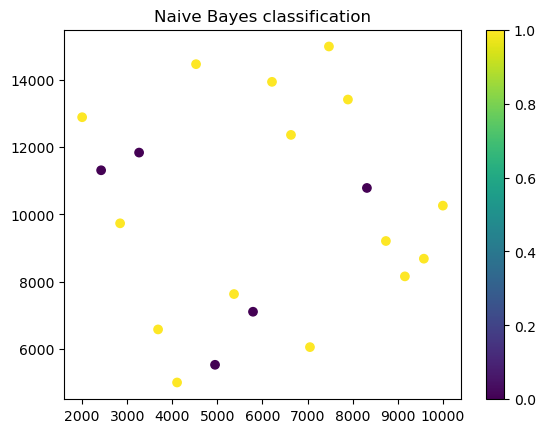

In [7]:
x1_plt = x_pd['Block 1 (Hydrophobic) [End Segment]', 'Block Size'].values
x2_plt = x_pd['Block 2 (Hydrophilic) [Middle Segment]', 'Block Size'].values
class_pred = yhat_class
plt.scatter(x1_plt, x2_plt, c = class_pred)
plt.colorbar()
plt.title('Naive Bayes classification')
plt.show()